<a href="https://colab.research.google.com/github/tienpm/CS114.K21.KHTN/blob/master/TestSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python version: 3.6.9
OpenCv version: 4.1.2


Using TensorFlow backend.


Keras version: 2.2.5


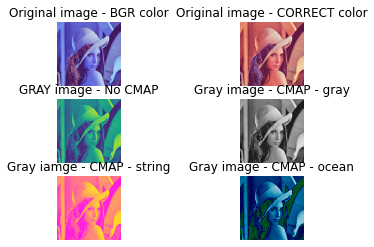

In [1]:
import numpy as np
import urllib
import matplotlib.pyplot as plt

#show verdion of packpages

#python version
from platform import python_version
print('Python version: {}'.format(python_version()))

#opencv version
import cv2
print('OpenCv version: {}'.format(cv2.__version__))

#tensorflow version
#import tensorflow as tf
#print ('TensorFlow version: {}'.format(tf.__version__))

#keras version
import keras
print('Keras version: {}'.format(keras.__version__))

# a function to read image from an url
def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype = 'uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return  image

import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

#MAIN
img_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
bgr_img = url2image(img_url)

#BGR order is the default in OpenCV
plt.subplot(3, 2, 1)
plt.axis('off')
plt.title('Original image - BGR color')
plt.imshow(bgr_img)

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title('Original image - CORRECT color')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

gray_img =  cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 3)
plt.axis('off')
plt.title('GRAY image - No CMAP')
plt.imshow(gray_img)

plt.subplot(3, 2, 4)
plt.axis('off')
plt.title('Gray image - CMAP - gray')
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))

plt.subplot(3, 2, 5)
plt.axis('off')
plt.title('Gray iamge - CMAP - string')
plt.imshow(gray_img, cmap = plt.get_cmap('spring'))

plt.subplot(3, 2, 6)
plt.axis('off')
plt.title('Gray image - CMAP - ocean')
plt.imshow(gray_img, cmap = plt.get_cmap('ocean'))

plt.show()


The cascade classifier xml fie already existed



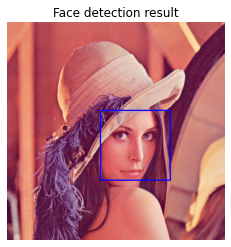

In [9]:
#Face detection

#import the necessary packages
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2

#a function to read image from an url
def url2iage(url):
  # downlaod the image, convert it in to a NumPy array, and then read it into OpenCv format
  resp = urlopen(url)
  image = np.array(bytearray(resp.read()), dtype = 'uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image # return the image

import sys
if sys.version_info.major == 3:
  from urllib.request import urlopen
else:
  from urllib import urlopen
  
import os.path

#MAIN
#Load image form url
bgr_img = url2image('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
face_classifier_xml = 'my_haarcascade_frontalface_defalt.xml'
ret = os.path.exists(face_classifier_xml)

if ret:
  print('The cascade classifier xml fie already existed\n')
else:
  print('Donwloading the cascade classifier xml file from Internet ...\n')
  face_classifier_url = 'https://raw.githubusercontent.com/shantnu/Webcam-Face-Detect/master/' + 'haarcascade_frontalface_default.xml'
  resp = urlopen(face_classifier_url)
  data = resp.read()
  
  #open the file for writtin
  fh = open(face_classifier_xml, 'wb')
  
  #read from request while writing the file
  fh.write(data)
  fh.close()
  resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml)
#face_cascede = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
faces = face_cascade.detectMultiScale(gray_img, 1.25, 3)
for (x, y, w, h) in faces:
  cv2.rectangle(bgr_img,(x,y), (x+w,y+h),(255,0,0),2)
   
plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

from google.colab import files
with open('')